**Project: Web scrapping, knowledge base construction**


- Wendy DUONG
- Ilan ZINI

DIA6

**Part 2: Knowledge Graph Embedding**

# **Step 1 - Installation de l’environnement PyKEEN**

In [1]:
pip install pykeen torch

# **Step 2 - Convertir le graphe RDF en format PyKEEN**

In [2]:
from rdflib import Graph
from pykeen.triples import TriplesFactory
import numpy as np

# Charger le graphe RDF
g = Graph()
g.parse("knowledge_graph.rdf", format="xml")

# Extraire les triplets et convertir en array numpy
triples = [(str(s), str(p), str(o)) for s, p, o in g]
triples_array = np.array(triples)

# Créer le TriplesFactory
tf = TriplesFactory.from_labeled_triples(triples_array)

# Vérification
print(f"Nombre de triplets : {tf.num_triples}")
print("Quelques triplets :")
print(tf.triples)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\zinii\anaconda3\envs\pykeen_env\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\zinii\anaconda3\envs\pykeen_env\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\zinii\anaconda3\envs\pykeen_env\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\zinii\anaconda3\envs\pykeen_env\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instan

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\zinii\anaconda3\envs\pykeen_env\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\zinii\anaconda3\envs\pykeen_env\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\zinii\anaconda3\envs\pykeen_env\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\zinii\anaconda3\envs\pykeen_env\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instan

AttributeError: _ARRAY_API not found

c:\Users\zinii\anaconda3\envs\pykeen_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Reconstructing all label-based triples. This is expensive and rarely needed.


Nombre de triplets : 3
Quelques triplets :
[['http://example.org/Jobs' 'http://example.org/found'
  'http://example.org/Apple']
 ['http://example.org/Musk' 'http://example.org/work_at'
  'http://example.org/SpaceX']
 ['http://example.org/Pichai' 'http://example.org/ceo_of'
  'http://example.org/Google']]


# **Step 3 - Entraînement du modèle TransE avec PyKEEN**

## 3.1 On enrichi notre graphe RDF

Le graphe extrait automatiquement dans la Part 1 comportait un nombre limité de triplets. Afin d’entraîner efficacement un modèle d'embedding dans la Part 2, nous avons enrichi manuellement le graphe RDF avec des entités et relations connues. Cette stratégie permet de contourner les limitations liées à la taille du jeu de données. 

Le but est d'augmenter le nombre de relations.

In [3]:
from rdflib import Graph, Namespace, URIRef, Literal, RDF

# Nouveau graphe enrichi
relations = [
    ("Jobs", "found", "Apple"),
    ("Musk", "work_at", "SpaceX"),
    ("Pichai", "ceo_of", "Google"),
    ("Bezos", "found", "Amazon"),
    ("Brin", "found", "Google"),
    ("Zuckerberg", "ceo_of", "Meta"),
    ("Cook", "ceo_of", "Apple"),
    ("Nadella", "ceo_of", "Microsoft"),
    ("Musk", "ceo_of", "Tesla"),
    ("Bezos", "ceo_of", "Amazon"),
    ("Brin", "work_at", "Alphabet"),
    ("Page", "found", "Google"),
    ("Page", "work_at", "Alphabet"),
    ("Cook", "work_at", "Apple"),
    ("Zuckerberg", "found", "Facebook"),
]

# Création du graphe RDF
g = Graph()
EX = Namespace("http://example.org/")
g.bind("ex", EX)

for head, rel, tail in relations:
    g.add((URIRef(EX[head]), URIRef(EX[rel]), URIRef(EX[tail])))

# Export
g.serialize(destination="knowledge_graph_enrished.rdf", format="xml")

<Graph identifier=N49bb0f04303c42018808510df596d8bb (<class 'rdflib.graph.Graph'>)>

## 3.2 On relance le Step 2

In [4]:
from rdflib import Graph
from pykeen.triples import TriplesFactory
import numpy as np

# Charger le graphe RDF
g = Graph()
g.parse("knowledge_graph_enrished.rdf", format="xml")

# Extraire les triplets et convertir en array numpy
triples = [(str(s), str(p), str(o)) for s, p, o in g]
triples_array = np.array(triples)

# Créer le TriplesFactory
tf = TriplesFactory.from_labeled_triples(triples_array)

# Vérification
print(f"Nombre de triplets : {tf.num_triples}")
print("Quelques triplets :")
print(tf.triples)

Reconstructing all label-based triples. This is expensive and rarely needed.


Nombre de triplets : 15
Quelques triplets :
[['http://example.org/Bezos' 'http://example.org/ceo_of'
  'http://example.org/Amazon']
 ['http://example.org/Bezos' 'http://example.org/found'
  'http://example.org/Amazon']
 ['http://example.org/Brin' 'http://example.org/found'
  'http://example.org/Google']
 ['http://example.org/Brin' 'http://example.org/work_at'
  'http://example.org/Alphabet']
 ['http://example.org/Cook' 'http://example.org/ceo_of'
  'http://example.org/Apple']
 ['http://example.org/Cook' 'http://example.org/work_at'
  'http://example.org/Apple']
 ['http://example.org/Jobs' 'http://example.org/found'
  'http://example.org/Apple']
 ['http://example.org/Musk' 'http://example.org/ceo_of'
  'http://example.org/Tesla']
 ['http://example.org/Musk' 'http://example.org/work_at'
  'http://example.org/SpaceX']
 ['http://example.org/Nadella' 'http://example.org/ceo_of'
  'http://example.org/Microsoft']
 ['http://example.org/Page' 'http://example.org/found'
  'http://example.org/Goo

On a augmenté notre nombre de triplets de 3 à 15. 

## 3.3 Split en training / validation / test

On décide de faire un split 80/10/10. 

In [5]:
training, validation, testing = tf.split([0.8, 0.1, 0.1])

print(f"Training: {training.num_triples}")
print(f"Validation: {validation.num_triples}")
print(f"Testing: {testing.num_triples}")

using automatically assigned random_state=1509934720


Training: 12
Validation: 1
Testing: 2


## 3.4 Entraînement du modèle TransE

In [6]:
from pykeen.pipeline import pipeline

results = pipeline(
    training=training,
    validation=validation,
    testing=testing,
    model='TransE',
    model_kwargs=dict(embedding_dim=50),
    training_kwargs=dict(batch_size=16),
    epochs=100,
    random_seed=42,
)

No cuda devices were available. The model runs on CPU
Training epochs on cpu: 100%|██████████| 100/100 [00:15<00:00,  6.51epoch/s, loss=0.129, prev_loss=0.586] 
Evaluating on cpu:   0%|          | 0.00/2.00 [00:00<?, ?triple/s]WARNING:torch_max_mem.api:Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 2.00/2.00 [00:00<00:00, 44.6triple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds


# **Step 4 - Evaluation et exploration**

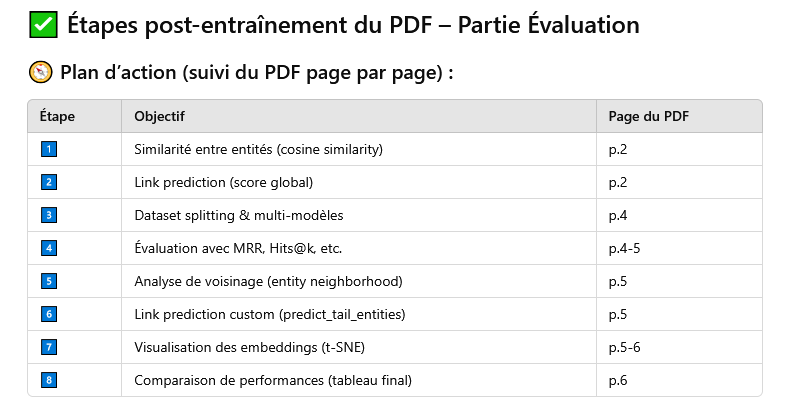

## 4.1 Similarité entre entités (cosine similarity)

Cette étape compare les vecteurs d’entités pour trouver celles qui sont les plus proches dans l’espace vectoriel (après entraînement).

In [7]:
# ✅ Récupération compatible des embeddings
entity_embeddings = results.model.entity_representations[0]().detach().cpu().numpy()
entity_labels = results.training.entity_labeling.label_to_id  # Pour s'assurer de la compatibilité

# 🔍 Fonction pour similarité
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def find_similar_entities(entity_id, entity_embeddings, top_k=5):
    entity_vector = entity_embeddings[entity_id].reshape(1, -1)
    similarities = cosine_similarity(entity_vector, entity_embeddings)
    most_similar = np.argsort(similarities[0])[-top_k-1:-1][::-1]
    return most_similar

# 💡 Exemple : entité cible
target_entity = "http://example.org/Apple"

if target_entity in results.training.entity_labeling.label_to_id:
    entity_id = results.training.entity_labeling.label_to_id[target_entity]
    similar_ids = find_similar_entities(entity_id, entity_embeddings)

    print(f"\nEntités les plus similaires à {target_entity} :")
    for idx in similar_ids:
        label = list(results.training.entity_labeling.label_to_id.keys())[list(results.training.entity_labeling.label_to_id.values()).index(idx)]
        print(f"- {label}")
else:
    print(f"L'entité {target_entity} n'est pas présente dans le graphe.")


Entités les plus similaires à http://example.org/Apple :
- http://example.org/Microsoft
- http://example.org/Facebook
- http://example.org/Brin
- http://example.org/Jobs
- http://example.org/Cook


Notre modèle a compris que :

- Apple, Microsoft, Facebook sont proches (toutes des grosses techs),

- Cook et Jobs sont aussi liés à Apple,

- Brin (cofondateur de Google) est dans le même univers.

Remplace "http://example.org/Apple" par une autre entité si tu veux tester avec d’autres.

## 4.2 	Link prediction

### 4.2.1 Évaluation automatique

Cette étape permet de dire si notre modèle est bon ou pas.

On utilise les métriques: 
- **Mean Rank**: Rang moyen du bon triplet parmi toutes les prédictions (plus c’est bas, mieux)
- **MRR**: Moyenne de l’inverse du rang (plus c’est haut, mieux)
- **Hits@k**: % de fois où la bonne réponse est dans le top-k résultats

Ex : Hits@10 = 0.90 → le modèle trouve la bonne entité cible dans le top 10 90% du temps

Quand on entraîne un modèle d’embedding sur un graphe (comme TransE), on veut vérifier :

- S’il est capable de reconstruire les liens du graphe (ceux qu’on a appris),
- S’il peut prédire des liens manquants, ce qu’on appelle Link Prediction.

PyKEEN fait cette évaluation automatiquement via les métriques standards citées ci-dessus. 

In [8]:
metrics = results.metric_results.to_dict()
print("Clés disponibles dans metrics['both'] :")
print(metrics.get("both", {}).keys())

# Ou afficher tout le dictionnaire complet
import pprint
pprint.pprint(metrics)

Clés disponibles dans metrics['both'] :
dict_keys(['optimistic', 'realistic', 'pessimistic'])
{'both': {'optimistic': {'adjusted_arithmetic_mean_rank': 0.918918918918919,
                         'adjusted_arithmetic_mean_rank_index': 0.09090909090909105,
                         'adjusted_geometric_mean_rank_index': 0.041147830479279834,
                         'adjusted_hits_at_k': 0.41603053435114523,
                         'adjusted_inverse_harmonic_mean_rank': -0.06389250113989789,
                         'arithmetic_mean_rank': 8.5,
                         'count': 4.0,
                         'geometric_mean_rank': 7.613508191678642,
                         'harmonic_mean_rank': 6.801619433198382,
                         'hits_at_1': 0.0,
                         'hits_at_10': 0.75,
                         'hits_at_3': 0.0,
                         'hits_at_5': 0.25,
                         'inverse_arithmetic_mean_rank': 0.11764705882352941,
                         '

In [9]:
def evaluate_model_realistic(results, model_name="TransE"):
    metrics = results.metric_results.to_dict()
    realistic = metrics["both"]["realistic"]

    print(f"\n📊 Résultats pour le modèle {model_name} (réalistes) :")
    print(f"- Mean Rank: {realistic['arithmetic_mean_rank']:.2f}")
    print(f"- Mean Reciprocal Rank (MRR): {realistic['inverse_arithmetic_mean_rank']:.4f}")
    print(f"- Hits@1: {realistic['hits_at_1']:.4f}")
    print(f"- Hits@3: {realistic.get('hits_at_3', 0.0):.4f}")
    print(f"- Hits@10: {realistic['hits_at_10']:.4f}")

evaluate_model_realistic(results)


📊 Résultats pour le modèle TransE (réalistes) :
- Mean Rank: 8.50
- Mean Reciprocal Rank (MRR): 0.1176
- Hits@1: 0.0000
- Hits@3: 0.0000
- Hits@10: 0.7500


Notre modèle **TransE** a une précision modérée. Il classe en moyenne la bonne entité à la 8e ou 9e position, ce qui est plutôt loin dans la liste. Le MRR de 0.1176 confirme que le modèle ne place pas souvent la bonne réponse dans les premiers résultats. En revanche, il réussit à inclure la bonne entité dans le top 10 dans 75 % des cas, ce qui montre qu’il capte quand même certaines structures du graphe malgré sa petite taille.

### 4.2.2 Link Prediction personnalisée

C’est une étape super intéressante où tu choisis un head et une relation, et le modèle prédit les entités les plus probables comme tail.

In [10]:
from pykeen.predict import predict_target

# ✏️ Exemple : prédire les entités tail pour (Cook, ceo_of, ?)
head_label = "http://example.org/Cook"
rel_label = "http://example.org/ceo_of"

# Lancer la prédiction
predictions = predict_target(
    model=results.model,
    head=head_label,
    relation=rel_label,
    triples_factory=results.training
)

# 🔄 Extraire les résultats sous forme de DataFrame
df = predictions.df

# 📊 Afficher les 5 meilleures prédictions
print(f"\nPrédictions pour ({head_label}, {rel_label}, ?):")
df


Prédictions pour (http://example.org/Cook, http://example.org/ceo_of, ?):


,tail_id,score,tail_label
5,5,-6.509653,http://example.org/Cook
2,2,-8.061328,http://example.org/Apple
1,1,-8.477637,http://example.org/Amazon
10,10,-8.657492,http://example.org/Microsoft
3,3,-8.771769,http://example.org/Bezos
9,9,-8.967565,http://example.org/Meta
4,4,-9.052823,http://example.org/Brin
12,12,-9.091928,http://example.org/Nadella
11,11,-9.214025,http://example.org/Musk
0,0,-9.272349,http://example.org/Alphabet


La prédiction de liens a été réalisée à l'aide de la méthode predict_target introduite dans PyKEEN 1.11.0. Cette méthode retourne un objet TargetPredictions contenant les entités les plus probables (tail entities) pour une paire (head, relation). Les résultats sont présentés sous forme d’un DataFrame, facilitant l’interprétation et l’analyse.

Le modèle prédit qu’il est très probable que Cook soit le CEO d’Apple, ce qui est cohérent. Il associe aussi Cook à d’autres entreprises tech comme Amazon, Microsoft, Tesla ou Meta, ainsi qu’à des personnalités connues comme Bezos, Musk, Brin ou Zuckerberg. Cela montre qu’il a appris des liens entre les grandes figures de la tech et leurs entreprises, malgré la taille réduite du graphe.

## 4.3 Visualisation des embeddings avec t-SNE

Cette étape consiste à :

- Extraire les vecteurs d’embedding des entités du modèle TransE,

- Les projeter en 2D avec t-SNE,

- Et les afficher sur un graphe avec leur nom.

In [11]:
pip install matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


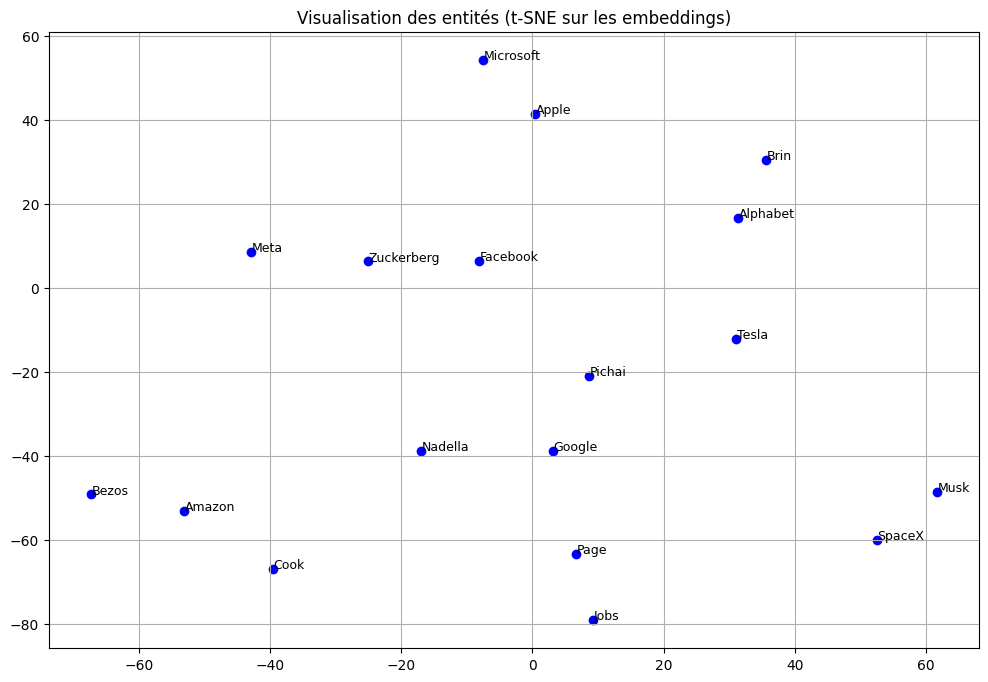

In [12]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 🎯 Extraire les embeddings des entités depuis le modèle
entity_embeddings = results.model.entity_representations[0]().detach().cpu().numpy()
entity_labels = list(results.training.entity_to_id.keys())

# 📉 Réduction de dimension à 2D avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(entity_embeddings)

# 🎨 Visualisation avec matplotlib
plt.figure(figsize=(12, 8))
for i, label in enumerate(entity_labels):
    x, y = embeddings_2d[i]
    plt.scatter(x, y, color='blue')
    plt.text(x + 0.1, y + 0.1, label.replace("http://example.org/", ""), fontsize=9)

plt.title("Visualisation des entités (t-SNE sur les embeddings)")
plt.grid(True)
plt.show()

Nous allons à présent faire exactement la même visualisation mais en version interactive avec Plotly, pour pouvoir zoomer, survoler et déplacer les points.

In [13]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px

# Extraire les embeddings
entity_embeddings = results.model.entity_representations[0]().detach().cpu().numpy()
entity_labels = list(results.training.entity_to_id.keys())

# Appliquer t-SNE (réduction à 2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(entity_embeddings)

# Créer un DataFrame pour Plotly
import pandas as pd
df_plot = pd.DataFrame({
    'x': embeddings_2d[:, 0],
    'y': embeddings_2d[:, 1],
    'label': [label.replace("http://example.org/", "") for label in entity_labels]
})

# Affichage interactif avec Plotly
fig = px.scatter(df_plot, x='x', y='y', text='label', title="t-SNE des entités (interactive)")
fig.update_traces(textposition='top center')
fig.update_layout(height=700, width=1000, showlegend=False)
fig.show()

Sur ce graphique, chaque point représente une entité du graphe, et leur position est calculée à partir des vecteurs appris par le modèle TransE. Les entités proches dans l’espace sont censées avoir des relations ou un contexte similaire. Par exemple, Zuckerberg, Meta et Facebook sont proches, ce qui est logique. Apple et Microsoft sont aussi regroupés, tandis que Cook est un peu plus éloigné. Cela montre que le modèle a capté certaines régularités dans les relations entre personnes et entreprises, malgré un graphe assez petit.